In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
import pickle


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
""""
Bone_Fracture_Binary_Classification/
├── train/
│   ├── fractured/
│   └── not fractured/
├── test/
│   ├── fractured/
│   └── not fractured/
└── val/
    ├── fractured/
    └── not fractured/
"""
dataset_path = 'bone-fracture.zip
# Create ImageDataGenerator for data augmentation (for training)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,         # Normalize pixel values
    rotation_range=20,         # Augmentations like rotations
    width_shift_range=0.2,     # Horizontal shifts
    height_shift_range=0.2,    # Vertical shifts
    shear_range=0.2,           # Shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    fill_mode='nearest'        # Fill in missing pixels
)

# ImageDataGenerator for test/validation (no augmentation, only rescaling)
test_val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the train data from the correct directory
train_generator = train_datagen.flow_from_directory(
    directory=f'{dataset_path}/train',  # Corrected path here
    target_size=(224, 224),  # Image size
    batch_size=32,
    class_mode='binary'
)

# Load the validation data
val_generator = test_val_datagen.flow_from_directory(
    directory=f'{dataset_path}/val',  # Corrected path here
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load the test data
test_generator = test_val_datagen.flow_from_directory(
    directory=f'{dataset_path}/test',  # Corrected path here
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


Class Distribution in Training Set: {'fractured': 4606, 'not fractured': 4640}


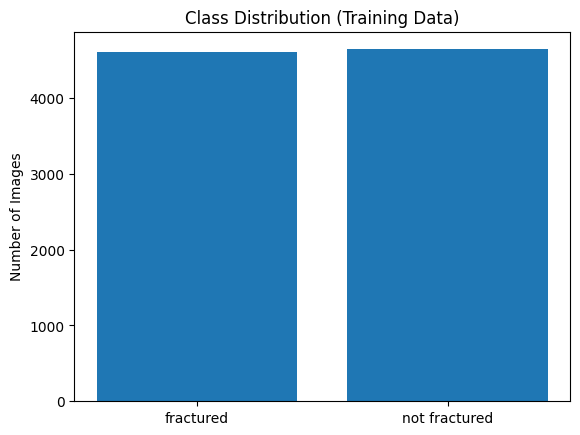

In [3]:
import os
import matplotlib.pyplot as plt
from collections import Counter


# Path to dataset (update with your dataset path)
dataset_path = '/Users/julianuss/Documents/GitHub/project_computer-vision/bone-fracture/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'

# Check the number of images in each class
train_path = f'{dataset_path}/train'
class_names = os.listdir(train_path)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names}
print("Class Distribution in Training Set:", class_counts)

# Visualize the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution (Training Data)')
plt.ylabel('Number of Images')
plt.show()

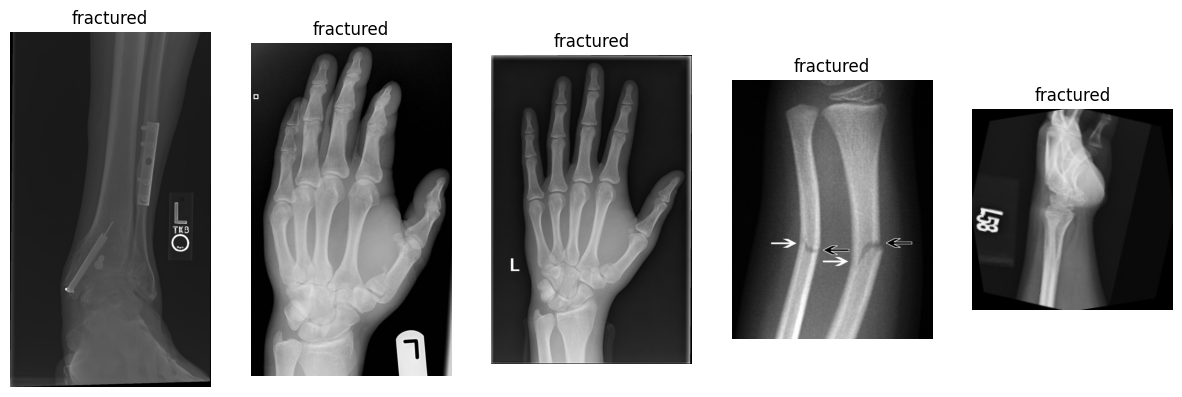

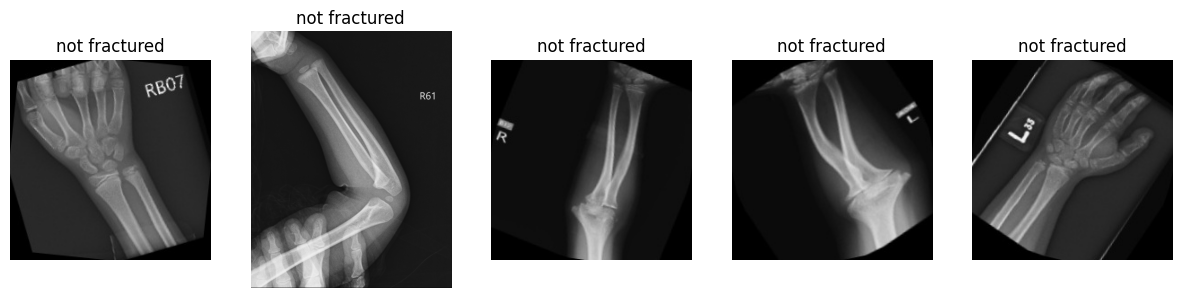

In [4]:
import cv2
import random

# Function to display random images from each class
def show_sample_images(class_name, dataset_path, num_images=5):
    path = os.path.join(dataset_path, 'train', class_name)
    image_files = random.sample(os.listdir(path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img = cv2.imread(os.path.join(path, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')
    plt.show()

# Show images from 'fractured' and 'not fractured' classes
show_sample_images('fractured', dataset_path)
show_sample_images('not fractured', dataset_path)

libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: /Users/julianuss/Documents/GitHub/project_computer-vision/bone-fracture/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/26(1).jpg
Failed to load image: /Users/julianuss/Documents/GitHub/project_computer-vision/bone-fracture/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/159.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid


Failed to load image: /Users/julianuss/Documents/GitHub/project_computer-vision/bone-fracture/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/2.jpg


libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Image size distribution: Counter({'Small (<=300x300)': 8578, 'Extra Large (>1000x1000)': 360, 'Medium (300x600)': 201, 'Large (600x1000)': 104})


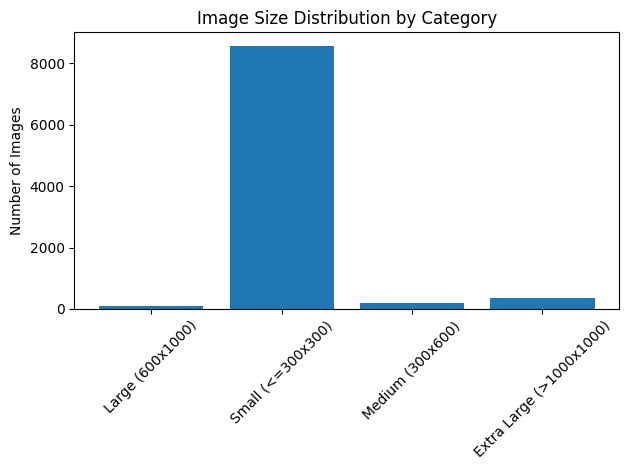

In [5]:
import os
import cv2
from collections import Counter
import matplotlib.pyplot as plt

# Function to assign images to general size categories
def categorize_image_size(h, w):
    if h <= 300 and w <= 300:
        return 'Small (<=300x300)'
    elif h <= 600 and w <= 600:
        return 'Medium (300x600)'
    elif h <= 1000 and w <= 1000:
        return 'Large (600x1000)'
    else:
        return 'Extra Large (>1000x1000)'

# Function to check image dimensions and group them into size categories
def check_image_dimensions(dataset_path):
    size_categories = []
    for class_name in os.listdir(os.path.join(dataset_path, 'train')):
        class_path = os.path.join(dataset_path, 'train', class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                category = categorize_image_size(h, w)
                size_categories.append(category)
            else:
                print(f"Failed to load image: {img_path}")
    
    return Counter(size_categories)

# Check for the training dataset
image_size_distribution = check_image_dimensions(dataset_path)
print("Image size distribution:", image_size_distribution)

# Visualize the distribution of image sizes
sizes, counts = zip(*image_size_distribution.items())
plt.bar(sizes, counts)
plt.title('Image Size Distribution by Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

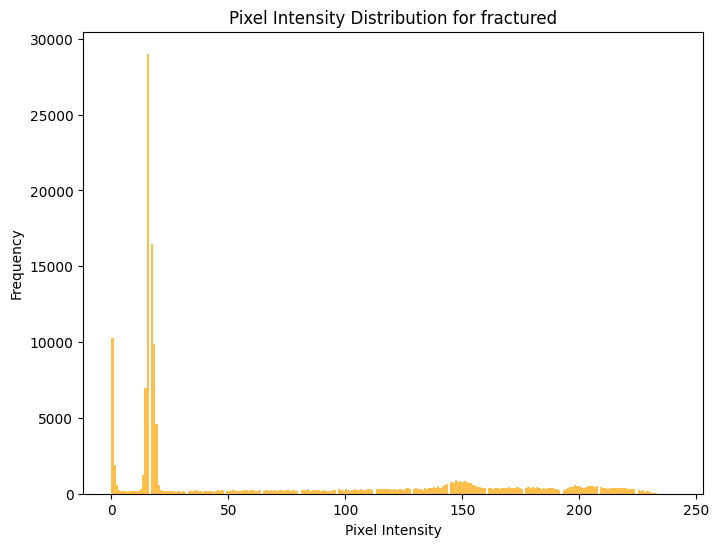

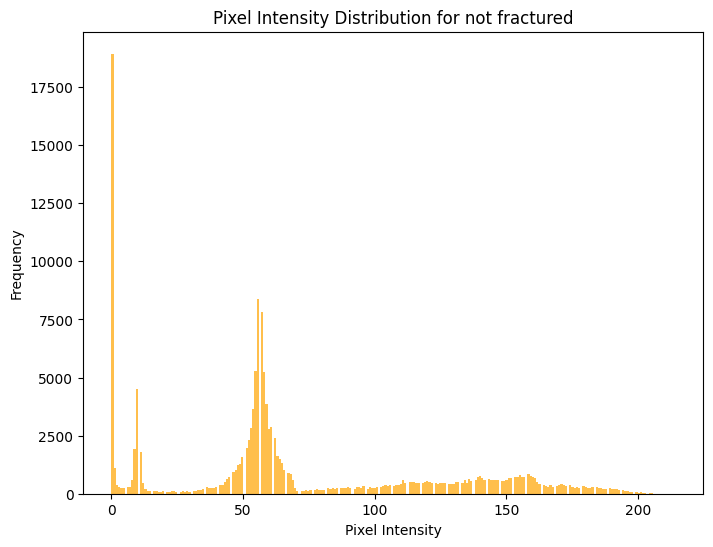

In [6]:
def plot_image_histogram(img, class_name):
    plt.figure(figsize=(8, 6))
    plt.hist(img.ravel(), bins=256, color='orange', alpha=0.7, label='Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Pixel Intensity Distribution for {class_name}')
    plt.show()

# Load and plot histogram for a random 'fractured' image
fractured_img_path = os.path.join(dataset_path, 'train', 'fractured', random.choice(os.listdir(f'{dataset_path}/train/fractured')))
fractured_img = cv2.imread(fractured_img_path)
plot_image_histogram(fractured_img, 'fractured')

# Load and plot histogram for a random 'not fractured' image
not_fractured_img_path = os.path.join(dataset_path, 'train', 'not fractured', random.choice(os.listdir(f'{dataset_path}/train/not fractured')))
not_fractured_img = cv2.imread(not_fractured_img_path)
plot_image_histogram(not_fractured_img, 'not fractured')

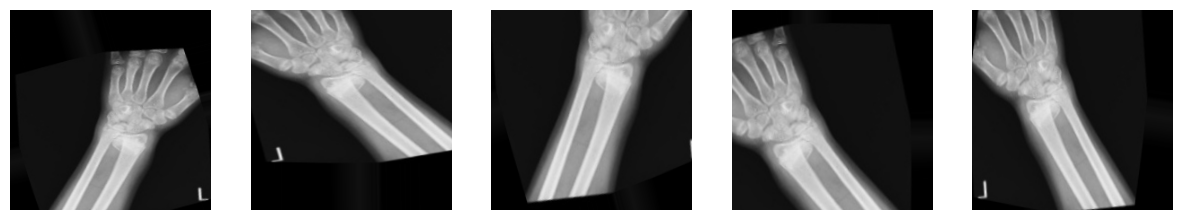

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load a single image and apply transformations
def preview_augmentations(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((1, ) + img.shape)  # Reshape to (1, height, width, channels)

    # Create augmented images
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, batch in enumerate(datagen.flow(img, batch_size=1)):
        axes[i].imshow(batch[0])
        axes[i].axis('off')
        if i == 4:  # Show 5 augmented images
            break
    plt.show()

# Preview augmentation for a random 'fractured' image
preview_augmentations(fractured_img_path)

libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


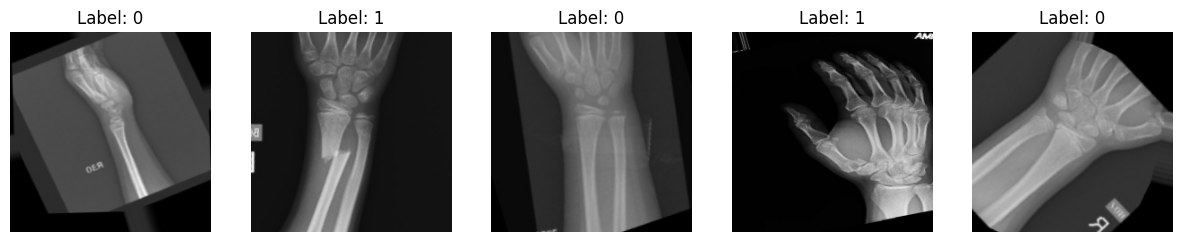

In [8]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.05):
    gauss = np.random.normal(mean, sigma, img.shape)
    noisy_img = img + gauss
    noisy_img = np.clip(noisy_img, 0, 1)  # Ensure pixel values remain in the [0, 1] range
    return noisy_img

# Apply Gaussian blur
def apply_gaussian_blur(img, ksize=(5, 5), sigmaX=1):
    blurred_img = cv2.GaussianBlur(img, ksize, sigmaX)
    return blurred_img

# Resize, normalize, and augment (noise + blur) grayscale images
def preprocess_image(img, target_size=(224, 224), apply_noise=False, apply_blur=False):
    # Ensure the image is grayscale (single channel)
    if len(img.shape) == 3:  # If the image is not grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to the desired size
    img_resized = cv2.resize(img, target_size)
    
    # Normalize the pixel values to [0, 1]
    img_normalized = img_resized / 255.0
    
    # Optionally apply Gaussian noise
    if apply_noise:
        img_normalized = add_gaussian_noise(img_normalized)
    
    # Optionally apply Gaussian blur
    if apply_blur:
        img_normalized = apply_gaussian_blur(img_normalized)
    
    # Expand dimensions to match the expected input shape (height, width, channels)
    # Replicate the grayscale channel to simulate 3 channels (e.g., (224, 224, 3))
    img_expanded = np.stack([img_normalized] * 3, axis=-1)  # Stack to create 3 channels
    
    return img_expanded

# Augmenting data with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images for augmentation
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True       # Flip horizontally
)

# Load and preprocess a batch of images
def load_and_preprocess_images(dataset_path, target_size=(224, 224)):
    images = []
    labels = []
    
    for class_name in os.listdir(os.path.join(dataset_path, 'train')):
        class_path = os.path.join(dataset_path, 'train', class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is not None:
                preprocessed_img = preprocess_image(img, target_size)
                images.append(preprocessed_img)
                labels.append(0 if class_name == 'not fractured' else 1)
    
    return np.array(images), np.array(labels)

# Example usage
train_images, train_labels = load_and_preprocess_images(dataset_path, target_size=(224, 224))

# Flow data from directory for augmented data
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Check some preprocessed images
def show_samples(generator, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img, label = next(generator)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img[0])  # Removed cmap='gray' since we're visualizing the RGB version
        plt.title(f"Label: {label[0]}")
        plt.axis('off')
    plt.show()

# Show some augmented images
show_samples(train_generator)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Load and preprocess images
train_images, train_labels = load_and_preprocess_images(dataset_path, target_size=(224, 224))
val_images, val_labels = load_and_preprocess_images(dataset_path.replace('train', 'val'), target_size=(224, 224))  # Adjust paths

# Step 2: Define CNN model for classification
def build_model(input_shape=(224, 224, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularization to prevent overfitting
        
        Dense(1, activation='sigmoid')  # Output layer for binary classification (fractured or not fractured)
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the model
model = build_model(input_shape=(224, 224, 3))

# Step 3: Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()

# Step 4: Create data generators
batch_size = 32
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=batch_size)

# Step 5: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Adjust epochs based on performance
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size
)

# Step 6: Evaluate the model
test_images, test_labels = load_and_preprocess_images(dataset_path.replace('train', 'test'), target_size=(224, 224))  # Adjust paths
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(test_images, test_labels, batch_size=batch_size)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
/Library/Frameworks/Python.framework/Ver

Epoch 1/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 140s 482ms/step - accuracy: 0.5953 - loss: 0.6774 - val_accuracy: 0.7539 - val_loss: 0.5132
Epoch 2/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8125 - loss: 0.5040 - val_accuracy: 0.7778 - val_loss: 0.5422
Epoch 3/20


2024-10-18 15:55:44.523730: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-18 15:55:44.646091: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


288/288 ━━━━━━━━━━━━━━━━━━━━ 137s 476ms/step - accuracy: 0.7377 - loss: 0.5322 - val_accuracy: 0.8518 - val_loss: 0.3599
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 308us/step - accuracy: 0.8750 - loss: 0.3355 - val_accuracy: 0.8148 - val_loss: 0.3795
Epoch 5/20


2024-10-18 15:58:02.491219: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


288/288 ━━━━━━━━━━━━━━━━━━━━ 139s 481ms/step - accuracy: 0.7997 - loss: 0.4369 - val_accuracy: 0.8860 - val_loss: 0.2824
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 349us/step - accuracy: 0.9062 - loss: 0.3645 - val_accuracy: 0.8889 - val_loss: 0.2540
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 137s 476ms/step - accuracy: 0.8373 - loss: 0.3673 - val_accuracy: 0.9218 - val_loss: 0.1892
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 0.8750 - loss: 0.2789 - val_accuracy: 0.9259 - val_loss: 0.1381
Epoch 9/20


2024-10-18 16:02:39.660228: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


288/288 ━━━━━━━━━━━━━━━━━━━━ 136s 472ms/step - accuracy: 0.8625 - loss: 0.3191 - val_accuracy: 0.9304 - val_loss: 0.2017
Epoch 10/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - accuracy: 0.9062 - loss: 0.2491 - val_accuracy: 0.9630 - val_loss: 0.1171
Epoch 11/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 134s 466ms/step - accuracy: 0.8932 - loss: 0.2639 - val_accuracy: 0.9527 - val_loss: 0.1323
Epoch 12/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.8750 - loss: 0.2965 - val_accuracy: 1.0000 - val_loss: 0.0901
Epoch 13/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 134s 466ms/step - accuracy: 0.8954 - loss: 0.2472 - val_accuracy: 0.9550 - val_loss: 0.1192
Epoch 14/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - accuracy: 0.8750 - loss: 0.3134 - val_accuracy: 1.0000 - val_loss: 0.0540
Epoch 15/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 137s 475ms/step - accuracy: 0.9106 - loss: 0.2254 - val_accuracy: 0.9718 - val_loss: 0.1077
Epoch 16/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.8750 - loss: 0.218

2024-10-18 16:11:43.546802: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


288/288 ━━━━━━━━━━━━━━━━━━━━ 134s 466ms/step - accuracy: 0.9260 - loss: 0.2004 - val_accuracy: 0.9745 - val_loss: 0.0748
Epoch 18/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.9375 - loss: 0.1495 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 19/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 132s 457ms/step - accuracy: 0.9397 - loss: 0.1715 - val_accuracy: 0.9770 - val_loss: 0.0689
Epoch 20/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.9375 - loss: 0.1073 - val_accuracy: 1.0000 - val_loss: 0.0192


libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


: 

In [ ]:
# Plotting training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history
plot_training_history(history)

In [ ]:
# Load the test image and preprocess it
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_single_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size, color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Path to your image
test_img_path = '/path_to_your_image/image.jpg'

# Preprocess the image
test_image = preprocess_single_image(test_img_path)

# Get prediction
prediction = model.predict(test_image)

# Interpret the prediction
if prediction >= 0.5:
    print("Prediction: Fractured")
else:
    print("Prediction: Not Fractured")